In [56]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures


In [57]:
df = pd.read_csv("/content/Nat_Gas.csv")
df.head(5)

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [69]:
# prompt: separate month and year   add column

# Assuming 'Date' column exists and is in 'YYYY-MM-DD' format
df['Month'] = pd.to_datetime(df['Dates']).dt.month
df['Year'] = pd.to_datetime(df['Dates']).dt.year
print(df.head(6))


      Dates  Prices  Month  Year
0  10/31/20    10.1     10  2020
1  11/30/20    10.3     11  2020
2  12/31/20    11.0     12  2020
3   1/31/21    10.9      1  2021
4   2/28/21    10.9      2  2021
5   3/31/21    10.9      3  2021


<ipython-input-69-5422ff71d7a8>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month'] = pd.to_datetime(df['Dates']).dt.month
<ipython-input-69-5422ff71d7a8>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Year'] = pd.to_datetime(df['Dates']).dt.year


In [59]:

# Check for missing values in each column
missing_values_count = df.isnull().sum()

print(missing_values_count)


Dates     0
Prices    0
Month     0
Year      0
dtype: int64


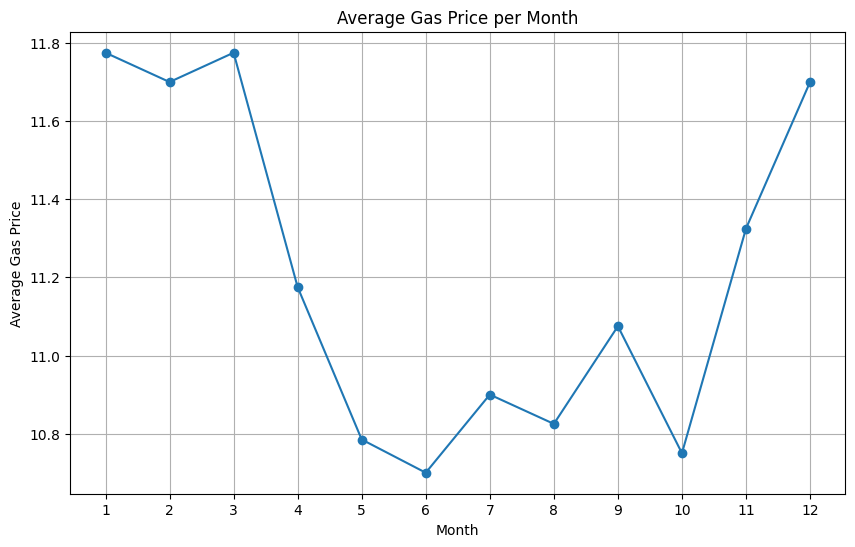

In [60]:


# Group data by month and calculate the average gas price for each month
monthly_avg_price = df.groupby('Month')['Prices'].mean()

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_price.index, monthly_avg_price.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Average Gas Price')
plt.title('Average Gas Price per Month')
plt.xticks(monthly_avg_price.index)  # all months are displayed on the x-axis
plt.grid(True)
plt.show()


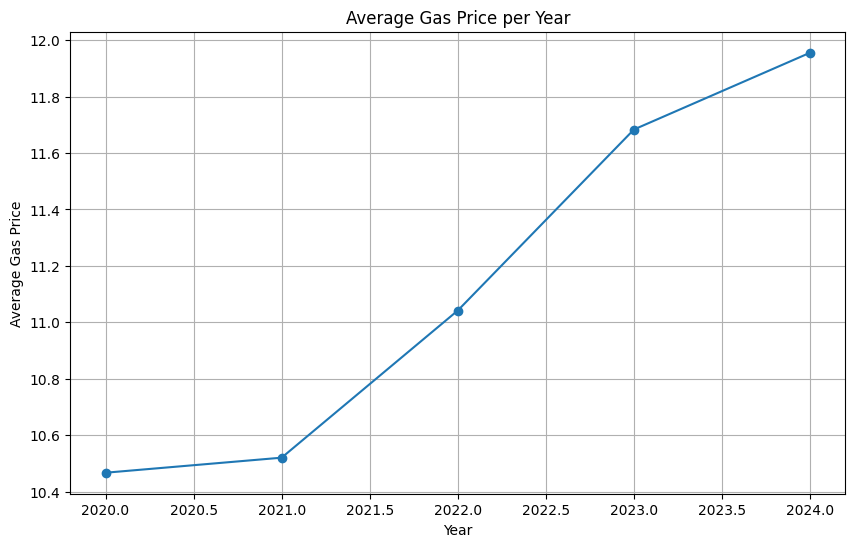

In [61]:

import pandas as pd
import matplotlib.pyplot as plt


# Group data by year and calculate the average gas price for each year
yearly_avg_price = df.groupby('Year')['Prices'].mean()

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_price.index, yearly_avg_price.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Gas Price')
plt.title('Average Gas Price per Year')
plt.grid(True)
plt.show()


In [72]:
#Develop model for price prediction

# Prepare features and target
X = df[['Month', 'Year']]
y = df['Prices']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Polynomial Features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Evaluate model accuracy
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Predict gas price based on user inputs
user_month = 8
user_year = 2026
if user_month and user_year:  # Both month and year provided
    # Transform user input using the same PolynomialFeatures
    user_input = poly.transform([[user_month, user_year]])
    predicted_price = model.predict(user_input)
    print(f"Predicted gas price{user_month,user_year} : {predicted_price[0]}")


Mean Squared Error: 0.08
R-squared: 0.84
Predicted gas price(8, 2026) : 12.54285549542692


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
